In [66]:
import pandas as pd
import numpy as np
data=pd.read_excel(r'C:\Users\Rideema Malji\Downloads\SCHW\SCHW.xlsx')

In [67]:
data.datetime=pd.to_datetime(data.datetime)
data.set_index('datetime',inplace=True)
data.sort_index(inplace=True)

In [68]:
data

,aroon_down,aroon_up,minus_dm,mom,percent_b,plus_dm,roc,rocp,rsi
datetime,,,,,,,,,
2023-03-06 10:28:00,66.67,22.22,0.14,-0.02,0.55,0.16,-0.03,0.00,54.00
2023-03-06 10:29:00,55.56,11.11,0.12,-0.03,0.50,0.14,-0.04,0.00,52.03
2023-03-06 10:30:00,44.44,0.00,0.16,0.04,0.35,0.13,0.05,0.00,47.19
2023-03-06 10:31:00,33.33,55.56,0.18,-0.07,0.18,0.11,-0.09,0.00,42.02
2023-03-06 10:32:00,22.22,100.00,0.16,0.11,0.83,0.19,0.15,0.00,56.14
...,...,...,...,...,...,...,...,...,...
2023-03-22 15:55:00,77.78,33.33,0.47,-0.15,0.26,0.15,-0.27,0.00,37.08
2023-03-22 15:56:00,66.67,22.22,0.42,-0.19,0.29,0.18,-0.34,0.00,37.08
2023-03-22 15:57:00,55.56,11.11,0.37,-0.16,0.33,0.16,-0.28,0.00,38.28


<AxesSubplot:xlabel='datetime'>

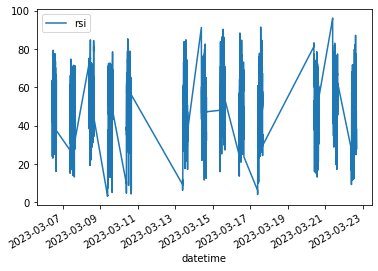

In [141]:
data[['rsi']].plot()

In [69]:
df=data[['rsi']].values

In [75]:
df[:10]

array([[54.  ],
       [52.03],
       [47.19],
       [42.02],
       [56.14],
       [47.3 ],
       [47.3 ],
       [48.29],
       [48.28],
       [45.59]])

In [71]:
train,test=df[:int(len(df)*.70),:],df[int(len(df)*.70):,:]

In [82]:
train=train.reshape(1,-1)[0]
test=test.reshape(1,-1)[0]

In [129]:
def converttomatrix(data,step):
    X,Y=[],[]
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return(np.array(X),np.array(Y))

In [130]:
trainX,trainY=converttomatrix(train,5)
testX,testY=converttomatrix(test,5)

In [131]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [132]:
step=5

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential() #Dense(2)
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.SimpleRNN(units=32, input_shape=(1,step),activation="relu"))
model.add(layers.Dense(8, activation="relu"))
# Add a RNN layer with 128 internal units.
model.add(layers.Dense(2))
# Add a Dense layer with 10 units.
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 32)                1216      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,498
Trainable params: 1,498
Non-trainable params: 0
_________________________________________________________________


In [134]:
trainX = np.asarray(trainX).astype(np.float32)
trainY = np.asarray(trainY).astype(np.float32)

In [135]:
trainY

array([47.3 , 47.3 , 48.29, ..., 10.03, 23.3 , 22.69], dtype=float32)

In [136]:
trainX = tf.convert_to_tensor(trainX)
trainY = tf.convert_to_tensor(trainY)

In [152]:
testX

array([[[33.13, 29.24, 19.55, 23.13, 30.54]],

       [[29.24, 19.55, 23.13, 30.54, 29.18]],

       [[19.55, 23.13, 30.54, 29.18, 28.71]],

       ...,

       [[32.2 , 30.24, 31.8 , 37.08, 37.08]],

       [[30.24, 31.8 , 37.08, 37.08, 38.28]],

       [[31.8 , 37.08, 37.08, 38.28, 35.95]]])

In [137]:
model.fit(trainX,trainY,epochs=50,batch_size=12,verbose=11)
#train_pred=model.predict(trainX)
test_pred= model.predict(testX)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
47/47 [==============================] - 0s 674us/step


In [157]:
test_pred=test_pred[:,:1]

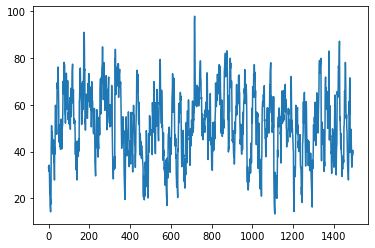

In [159]:
import matplotlib.pyplot as plt
plt.plot(test_pred[:,:1])

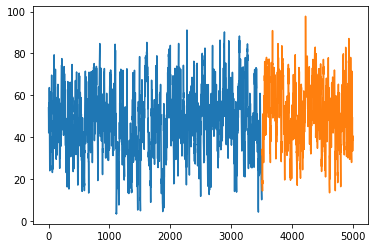

In [169]:
plt.plot(np.arange(0,len(train)),train)
plt.plot(np.arange(len(train),len(train)+len(test_pred[:,:1])),test_pred[:,:1])